## To analyze the impact of discounts on sales

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_excel("Superstore - Copy.xlsx")

In [39]:
df.head()

,row id,customer id,order date,shipping date,ship mode,customer id.1,customer name,segment,country,city,...,postal code,region,product id,category,sub category,product name,sales,quantity,discount,profit
0,1,CA2016152156,2023-07-01,2021-07-08,Second Class,CG12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FURBO10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA2016152156,2022-07-03,2023-05-11,Second Class,CG12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FURCH10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3,0.00,219.5820
2,3,CA2016138688,2021-08-16,2021-11-02,Second Class,DV13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFFLA10000240,Office Supplies,Labels,SelfAdhesive Address Labels for Typewriters by...,14.6200,2,0.00,6.8714
3,4,US2015108966,2021-04-14,2022-12-21,Standard Class,SO20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,33311,South,FURTA10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,383.0310
4,5,US2015108966,2021-01-02,2021-08-26,Standard Class,SO20335,Sean ODonnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFFST10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row id         9990 non-null   int64         
 1   customer id    9990 non-null   object        
 2   order date     9990 non-null   datetime64[ns]
 3   shipping date  9990 non-null   datetime64[ns]
 4   ship mode      9990 non-null   object        
 5   customer id.1  9990 non-null   object        
 6   customer name  9990 non-null   object        
 7   segment        9990 non-null   object        
 8   country        9990 non-null   object        
 9   city           9990 non-null   object        
 10  state          9990 non-null   object        
 11  postal code    9990 non-null   int64         
 12  region         9990 non-null   object        
 13  product id     9990 non-null   object        
 14  category       9990 non-null   object        
 15  sub category   9990 n

In [8]:
df.isnull().sum()

row id           0
customer id      0
order date       0
shipping date    0
ship mode        0
customer id.1    0
customer name    0
segment          0
country          0
city             0
state            0
postal code      0
region           0
product id       0
category         0
sub category     0
product name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

In [9]:
df.describe()

,row id,order date,shipping date,postal code,sales,quantity,discount,profit
count,9990.000000,9990,9990,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,4995.500000,2022-04-18 18:55:08.108108032,2022-04-18 08:56:04.324324352,55180.614314,229.827353,3.789790,0.156225,59.916593
min,1.000000,2021-01-01 00:00:00,2021-01-01 00:00:00,1040.000000,0.444000,1.000000,0.000000,0.000000
25%,2498.250000,2021-08-21 00:00:00,2021-08-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,5.369000
50%,4995.500000,2022-04-18 00:00:00,2022-04-21 00:00:00,56301.000000,54.432000,3.000000,0.200000,13.970000
75%,7492.750000,2022-12-10 00:00:00,2022-12-08 00:00:00,90008.000000,209.937500,5.000000,0.200000,43.152450
max,9990.000000,2023-08-01 00:00:00,2023-08-01 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2884.008929,NaN,NaN,32064.346058,623.327164,2.225467,0.206481,228.321164


In [10]:
df.shape

(9990, 21)

In [13]:
df.columns

Index(['row id', 'customer id', 'order date', 'shipping date', 'ship mode',
       'customer id.1', 'customer name', 'segment', 'country', 'city', 'state',
       'postal code', 'region', 'product id', 'category', 'sub category',
       'product name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

## Visualzing the relationship between discount and sales.


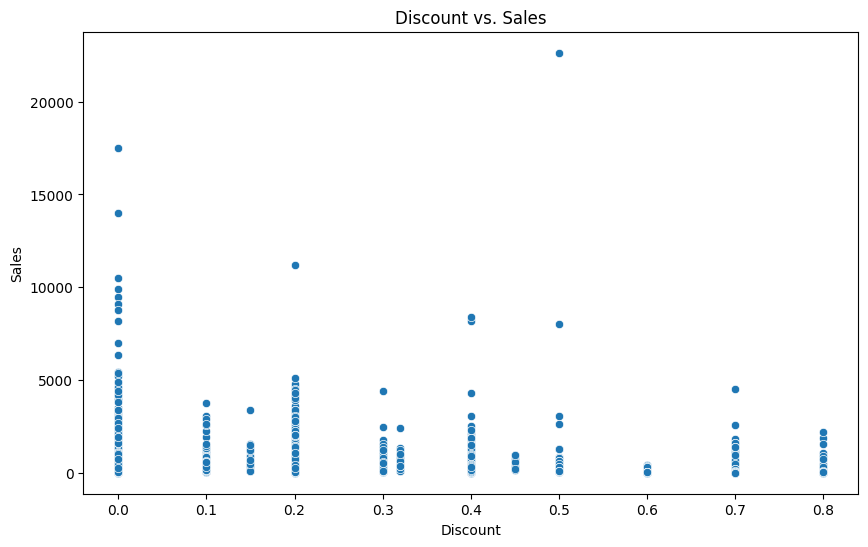

In [15]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount', y='sales', data=df)
plt.title('Discount vs. Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

## Correlation Analysis:
Use correlation coefficients to quantify the strength and direction of the relationship between discount and sales.

In [16]:
df['discount'].corr(df['sales'])

-0.028228675544162713

## Discount Distribution:
Understand the distribution of discounts in the dataset.

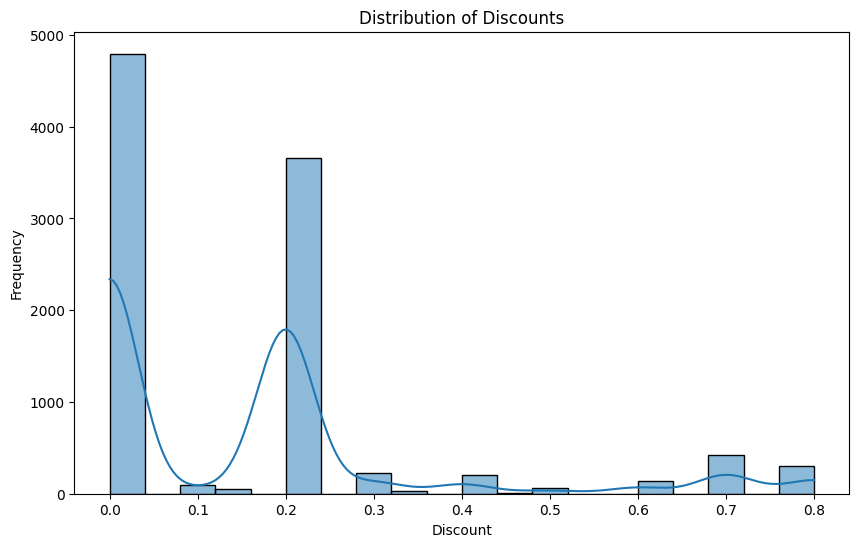

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['discount'], bins=20, kde=True)
plt.title('Distribution of Discounts')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()


## Profitability vs. Discount:
Examine the relationship between profitability and discount.

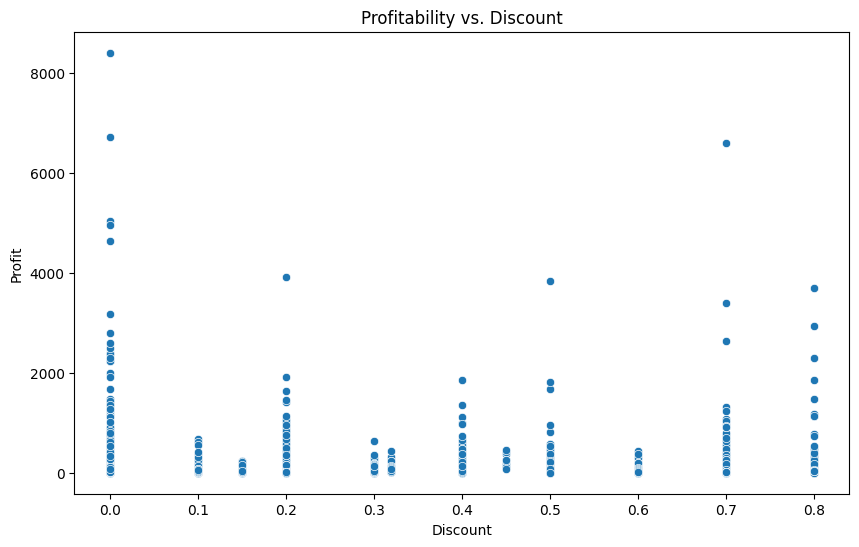

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount', y='profit', data=df)
plt.title('Profitability vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

## Experimenting with Different Discount Levels for Specific Products Category :

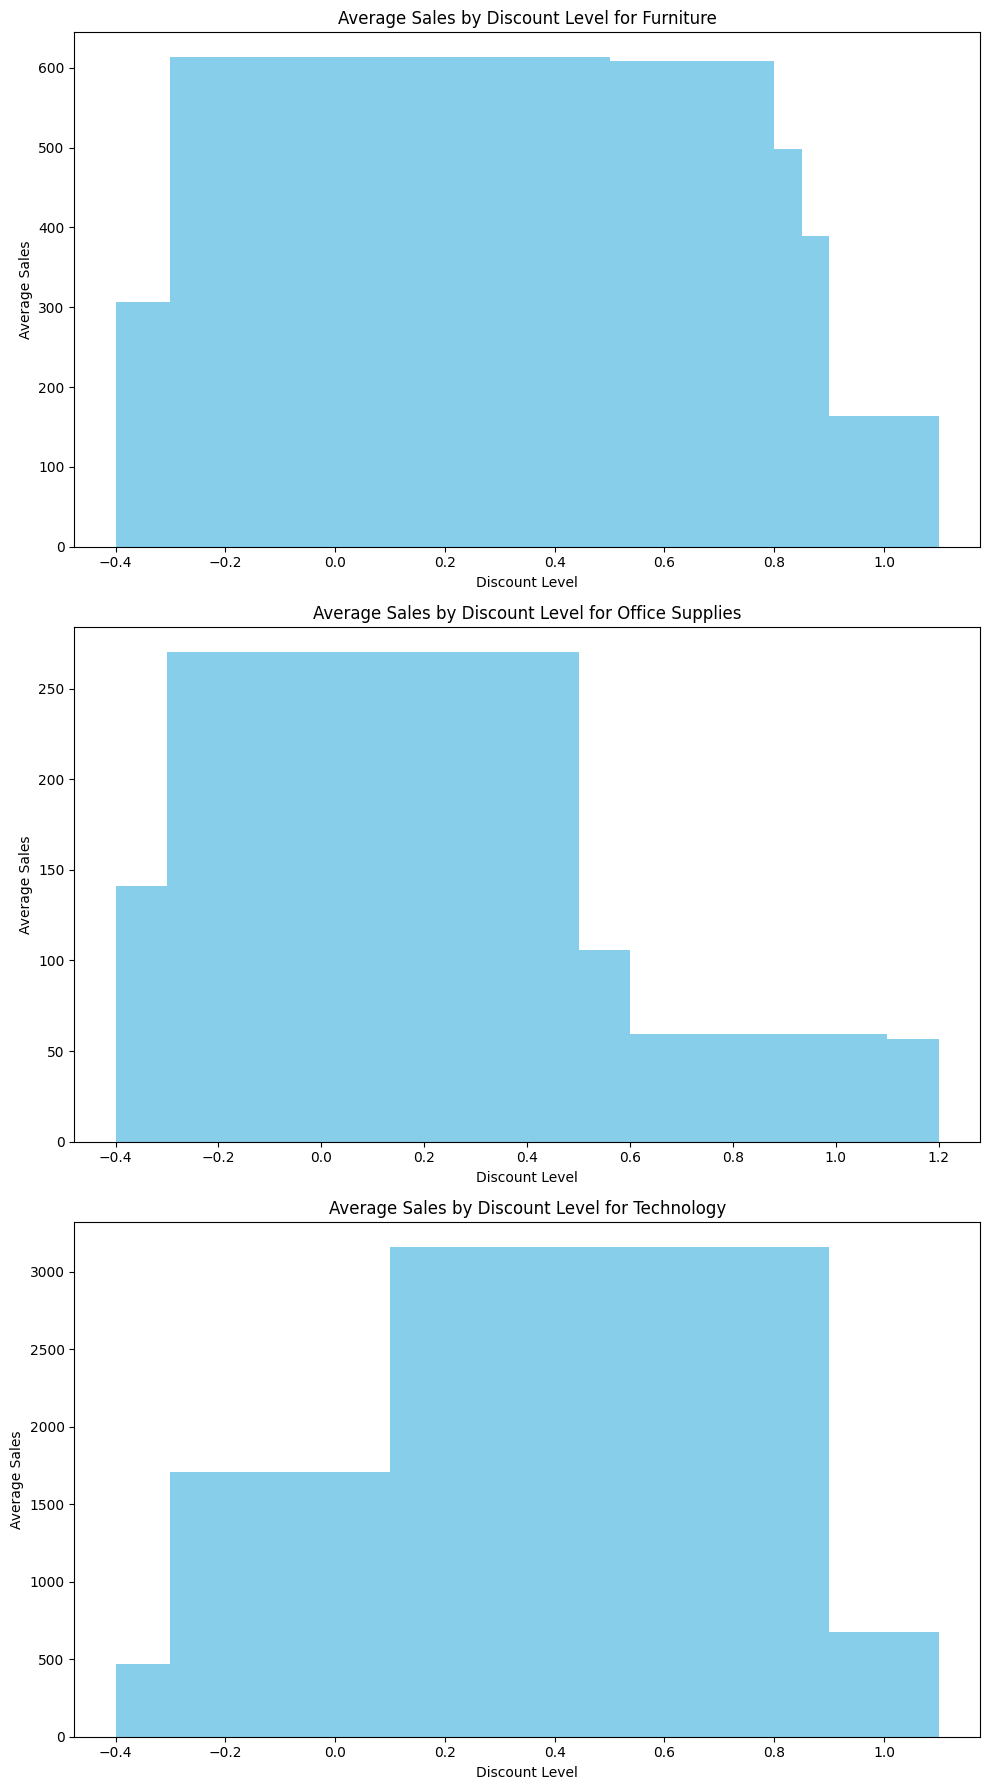

In [42]:
# Get unique categories
unique_categories = df['category'].unique()

# Create subplots based on the number of unique categories
num_categories = len(unique_categories)
fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(10, 6 * num_categories))

# Iterate over categories
for i, category in enumerate(unique_categories):
    category_df = df[df['category'] == category]
    
    # Group by discount levels and calculate the mean sales for each discount level
    discount_levels = category_df['discount'].unique()
    sales_by_discount = category_df.groupby('discount')['sales'].mean().reset_index()

    # Plot the results on the corresponding subplot
    ax = axes[i]
    ax.bar(sales_by_discount['discount'], sales_by_discount['sales'], color='skyblue')
    ax.set_xlabel('Discount Level')
    ax.set_ylabel('Average Sales')
    ax.set_title(f'Average Sales by Discount Level for {category}')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

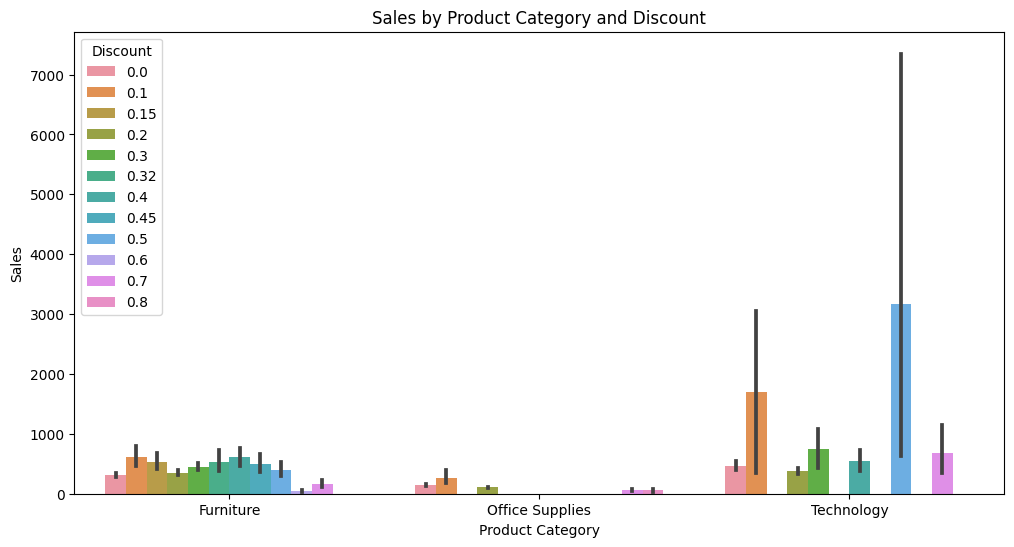

In [51]:
# Sales by Product Category and Discount
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='sales', hue='discount', data=df)
plt.title('Sales by Product Category and Discount')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.legend(title='Discount')
plt.show()

# You can examine how the impact of discounts varies across different product categories.
# Identify categories where discounts have a more significant impact on sales.


## Exploring the Impact of Discounts Across Different Customer Segments:

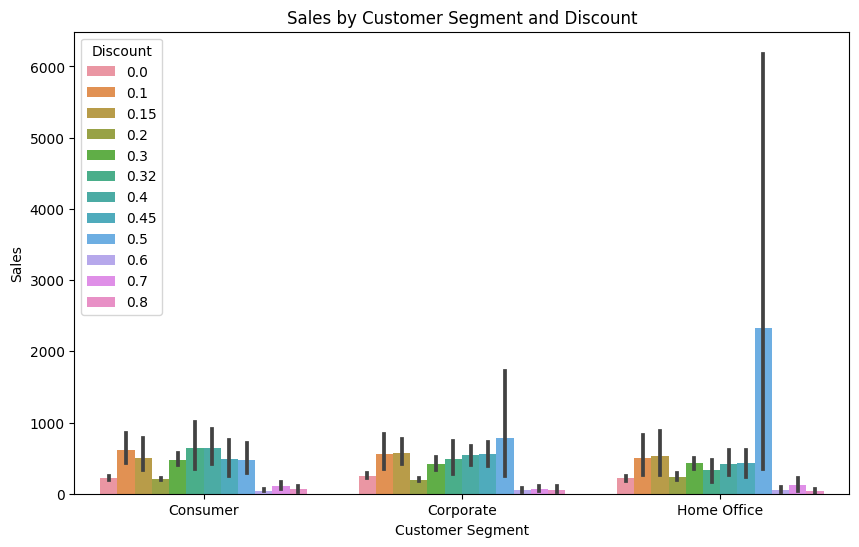

In [49]:
# Sales by Customer Segment
plt.figure(figsize=(10, 6))
sns.barplot(x='segment', y='sales', hue='discount', data=df)
plt.title('Sales by Customer Segment and Discount')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.legend(title='Discount')
plt.show()

# You can analyze how different customer segments respond to varying discount levels.
# Identify segments that show a significant increase in sales with higher discounts.


In [52]:
from scipy.stats import ttest_ind

# Assuming 'df' is your DataFrame
sales_with_discount = df[df['discount'] > 0]['sales']
sales_without_discount = df[df['discount'] == 0]['sales']

# Perform t-test
t_stat, p_value = ttest_ind(sales_with_discount, sales_without_discount, equal_var=False)

# Print the results
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')


T-Statistic: 0.46892807669916053
P-Value: 0.6391315584239916


## Conclusions
it suggests that changing discount levels may not be a strong driver of increased sales.